In [190]:
import numpy as np
import time
from matplotlib import pyplot as plt
plt.style.use('dark_background')

# Exercises:

## Masking Curves Framework:
### In this exercise you will develop the framework for computing the masking curve for a test signal. We will return to this test signal in the next chapters to complete the masking curve calculation and utilize these results to guide the bit allocation for this signal. 
### 1.Use an FFT to map a I kHz sine wave with amplitude equal to 1.0 into the frequency domain. Use a sample rate of 48 kHz and a block length of N = 2048. Do your windowing using a sine window. How wide is the peak? What is the sum of the spectral density IX[k]12 over the peak? Try dividing this sum by N2/8, how does the result relate to the amplitude of the input sine wave? (Check that you're right by changing the amplitude to Y2 and summing over the peak again.) If we define this signal as having an SPL of 96 dB, how can you estimate the SPL of other peaks you see in a test signal analyzed with the same FFT?


### 2. Use the same FFT to analyze the following signal:


$
x[n] == Au cos(2n:440n / Fs) + Al cos(21t554n / Fs)
+ A 2 cos(2n:660n / Fs) + A 3 cos(21t880n / Fs)
+ A 4 cos(21t4400n / Fs) + As cos(21t8800n / Fs )
$
### where Au = 0.6, Al = 0.55, A2 = 0.55, A3 = 0.15, A4 = 0.1, As = 0.05, and Fs is the sample rate of 48 kHz. Using the FFT results, identify the peaks in the signal and estimate their SPLs and frequencies. How do these results compare with what you know the answer to be based on the signal definition?

### 3. Apply the threshold in quiet to this spectrum. Create a graph comparing the test signal's frequency spectrum (measured in dB) with the threshold in quiet.

In [191]:
def sine_window(N):
    M = N//2
    w = np.zeros((N,1))

    for n in range(N-M):
        w[n] = np.sin((np.pi/2)*(n+1/2)/(N-M))
        
    for n in range(N-M,M):
        w[n] = 1

    for n in range(M,N):
        w[n] = np.sin((np.pi/2)*(N - n - 1/2)/(N-M))

    return w.reshape(-1)

(2048,)
(2048,)


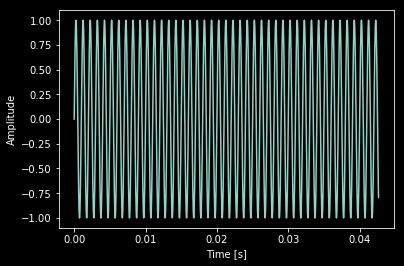

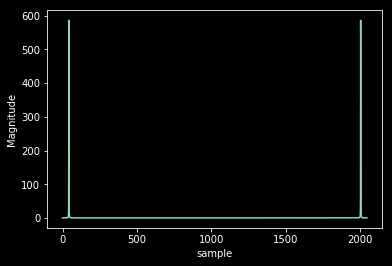

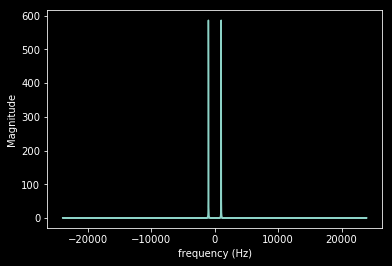

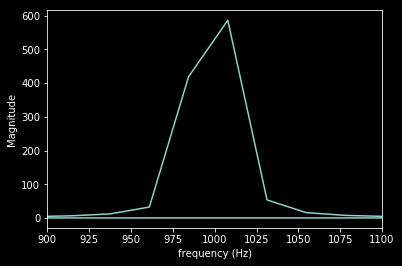

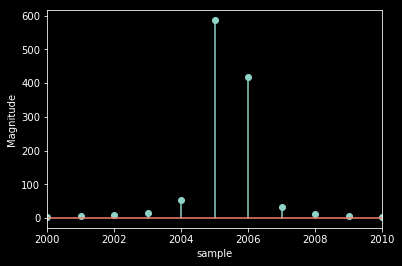

In [192]:
fs = 48000
N = 2048
T = N/fs
n = np.arange(N)
t = np.linspace(0, T, N)

sine_wave = np.sin(2 * np.pi * n * 1000 / fs)



print(sine_window(N).shape)
print(sine_wave.shape)
windowed_signal = sine_wave * sine_window(N)

plt.plot(t, sine_wave)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude");
plt.show()

sine_wave_freq_domain = np.fft.fft(windowed_signal)
plt.plot(np.abs(sine_wave_freq_domain))
plt.xlabel("sample")
plt.ylabel("Magnitude");
plt.show()

f_axis = np.fft.fftfreq(N, d=1/fs)
plt.plot(f_axis, np.abs(sine_wave_freq_domain))
plt.xlabel("frequency (Hz)")
plt.ylabel("Magnitude");
plt.show()

plt.plot(f_axis, np.abs(sine_wave_freq_domain))
plt.xlim(900,1100)
plt.xlabel("frequency (Hz)")
plt.ylabel("Magnitude");
plt.show()

sine_wave_freq_domain = np.fft.fft(windowed_signal)
plt.stem(np.abs(sine_wave_freq_domain))
plt.xlim(2000,2010)
plt.xlabel("sample")
plt.ylabel("Magnitude");
plt.show()

### defining "umbrella" functions:

In [209]:
def get_umbrella(array, index, umbrella=4):
    return array[index - umbrella//2 : index + umbrella//2 + 1]

### testing parseval:

In [194]:
np.sum([sample**2 for sample in windowed_signal])

512.0001382957531

In [208]:
np.sum([np.abs(sample) ** 2 for sample in sine_wave_freq_domain])/N

512.0001382957532

### $\frac{N^2}{8}$ factor:

In [197]:
np.sum([np.abs(sample) ** 2 for sample in sine_wave_freq_domain])/((N**2)/8)

2.000000540217786

In [198]:
np.sum([np.abs(sample) ** 2 for sample in sine_wave_freq_domain[2004:2007]])/((N**2)/8)

0.9969649371854523

In [199]:
fs = 48000
N = 2048
T = N/fs
n = np.arange(N)
t = np.linspace(0, T, N)

half_amplitude_sine_wave = 0.5 * np.sin(2 * np.pi * n * 1000 / fs)
half_amplitude_windowed_signal = half_amplitude_sine_wave * sine_window(N)
half_amplitude_sine_wave_freq_domain = np.fft.fft(half_amplitude_windowed_signal)
np.sum([np.abs(sample) ** 2 for sample in half_amplitude_sine_wave_freq_domain[2004:2007]])/((N**2)/8)

0.24924123429636308

In [207]:
values = get_umbrella(half_amplitude_sine_wave_freq_domain, 2005, umbrella=4)
np.sum([np.abs(sample) ** 2 for sample in values])/((N**2)/8)

0.2498544264162651

### dB representation:

In [242]:
def amplitude_to_db(amplitude):
    ##20log_10(amplitude/factor)
    fator = 1/(10 ** 4.8)
    return 20*np.log10(amplitude/fator)

In [243]:
def potencia_to_db(potencia):
    fator = 1/(10 ** 9.6)
    return 10*np.log10(potencia/fator)

In [229]:
def peaks_to_db(peaks, N=2048):
    k = np.sum(np.abs(peaks)**2)/((N**2)/8)
    return 96 + 10*np.log10(k)

In [230]:
def fft_to_db(fft, index, umbrella=4):
    peaks = get_umbrella(fft,index,umbrella)
    return peaks_to_db(peaks, len(fft))

In [220]:
amplitude_to_db(1)

96.0

In [248]:
#1/np.sqrt(2)=0.707
amplitude_to_db(1) - amplitude_to_db(0.707)

3.0116117240620213

In [249]:
amplitude_to_db(1) - amplitude_to_db(0.5)

6.020599913279625

In [250]:
potencia_to_db(1) - potencia_to_db(0.5)

3.0102999566398125

In [231]:
fft_to_db(sine_wave_freq_domain, 2005)

95.99747039127502

In [232]:
fft_to_db(half_amplitude_sine_wave_freq_domain, 2005)

89.97687047799539

$$
w_N[n] = \sin\left(\frac{\pi(n+\frac{1}{2})}{N}\right)
$$

$$
x_w[n] = 
\begin{dcases}
\sin\left(\frac{2\pi 1000 n}{F_s}\right)\sin\left(\frac{\pi(n+\frac{1}{2})}{N}\right), 0\leq n < N \\
0, \text{ otherwise}
\end{dcases}
$$

In [108]:
class MDCT():
    def __init__(self, N: int, window: np.ndarray):
        K = N//2
        self.n_0 = ((N/2) + 1)/2

        A = np.zeros((K,N))
        for k in range(K):
            for n in range(N):
                A[k,n] = np.cos((2*np.pi/N)*(n + self.n_0)*(k+1/2))

        self.N = N
        self.window = window
        self.A_1 = A[:,:N//2]
        self.A_2 = A[:,N//2:]
        self.B_1 = (4/N)*self.A_1.T
        self.B_2 = (4/N)*self.A_2.T

        self.A = A
        self.B = (4/N)*A.T

        if window.shape[0] != N:
            raise ValueError(f"Window is not the same size as N! Window size: {window.shape[0]}")

    def _preprocess(self, x: np.ndarray):
        L = len(x)
        self.frames = L//(self.N//2) + 1
        r = L%(self.N//2)
        return np.pad(x, (self.N // 2, self.N // 2 - r))


    def mdct(self, x: np.ndarray):
        x_padded = self._preprocess(x)

        X = np.ndarray((self.A.shape[0], self.frames))
        for frame_idx in range(self.frames):
            frame = x_padded[frame_idx*(self.N//2):frame_idx*(self.N//2)+self.N]
            X[:, frame_idx] = self.A @ (frame * self.window)

        return X

    def imdct(self, X: np.ndarray):
        x_padded = np.zeros(self.frames * self.N//2 + self.N//2)
        for frame_idx in range(self.frames):
            x_padded[frame_idx*self.N//2:frame_idx*self.N//2 + self.N] += (self.B @ X[:,frame_idx]) * self.window
            
        return x_padded[self.N//2:-self.N//2]
    
    def mdct_pre_twiddle(self):
        return np.exp(-2j * np.pi * np.arange(self.N) / (2*self.N))

    def mdct_post_twiddle(self):
        return np.exp(-2j * np.pi * self.n_0 * (np.arange(self.N//2) + 0.5) / self.N)


    def mdct_via_fft(self, x):
        x_padded = self._preprocess(x)

        X = np.ndarray((self.A.shape[0], self.frames))
        for frame_idx in range(self.frames):
            frame = x_padded[frame_idx*(self.N//2):frame_idx*(self.N//2)+self.N]
            X[:, frame_idx] = np.real(
                self.mdct_post_twiddle() * np.fft.fft(frame * self.window * self.mdct_pre_twiddle())[:self.N//2]
            )
        
        return X 
    
    def imdct_pre_twiddle(self):
        return np.exp(2j * np.pi * self.n_0 * np.arange(self.N) / self.N)

    def imdct_post_twiddle(self):
        return np.exp(2j * np.pi * (np.arange(self.N) + self.n_0) / (2*self.N))
    
    def imdct_via_ifft(self, X):
        x_padded = np.zeros(self.frames * self.N//2 + self.N//2)
        for frame_idx in range(self.frames):
            x_padded[frame_idx*self.N//2:frame_idx*self.N//2 + self.N] += \
            np.real(np.fft.ifft(np.concatenate((X[:,frame_idx], -X[::-1,frame_idx])) * self.imdct_pre_twiddle()) * \
            self.imdct_post_twiddle()) * 2 * self.window
            
        return x_padded[self.N//2:-self.N//2]

In [109]:
def sine_window(N):
    M = N//2
    w = np.zeros((N,1))

    for n in range(N-M):
        w[n] = np.sin((np.pi/2)*(n+1/2)/(N-M))
        
    for n in range(N-M,M):
        w[n] = 1

    for n in range(M,N):
        w[n] = np.sin((np.pi/2)*(N - n - 1/2)/(N-M))

    return w.reshape(-1)

In [110]:
N = 32
k = 5
n_0 = ((N/2) + 1)/2
x = np.cos((2*np.pi/N)*(np.arange(N) + n_0)*(k+1/2))

mdct: 0.0012319087982177734
mdct_fft: 0.0013310909271240234
imdct: 4.100799560546875e-05
imdct_fft: 0.0006427764892578125
erro: 5.620504062164855e-16
erro_fft: -6.522560269672795e-16


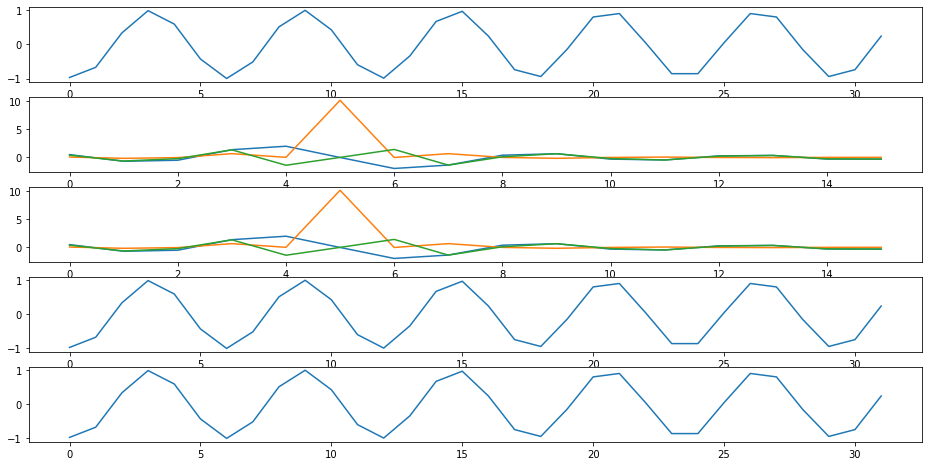

In [111]:
my_mdct = MDCT(N, sine_window(N))

mdct_start = time.time()
X = my_mdct.mdct(x)
mdct_end = time.time()
print(f'mdct: {mdct_end - mdct_start}')

mdct_fft_start = time.time()
X_fft = my_mdct.mdct_via_fft(x)
mdct_fft_end = time.time()
print(f'mdct_fft: {mdct_fft_end - mdct_fft_start}')

imdct_start = time.time()
x_hat = my_mdct.imdct(X)
imdct_end = time.time()
print(f'imdct: {imdct_end - imdct_start}')

imdct_fft_start = time.time()
x_hat_fft = my_mdct.imdct_via_ifft(X_fft)
imdct_fft_end = time.time()
print(f'imdct_fft: {imdct_fft_end - imdct_fft_start}')

print(f'erro: {(x - x_hat).sum()}')
print(f'erro_fft: {(x - x_hat_fft).sum()}')
fig, ax = plt.subplots(nrows = 5, ncols = 1, figsize=(16, 8))
ax[0].plot(x)
ax[1].plot(X)
ax[2].plot(X_fft)
ax[3].plot(x_hat)
ax[4].plot(x_hat_fft)

mdct: 0.014085054397583008
mdct_fft: 0.008776187896728516
imdct: 0.023583173751831055
imdct_fft: 0.015288114547729492
erro: -3.296304201816369e-13
erro_fft: -4.3131730825818337e-13


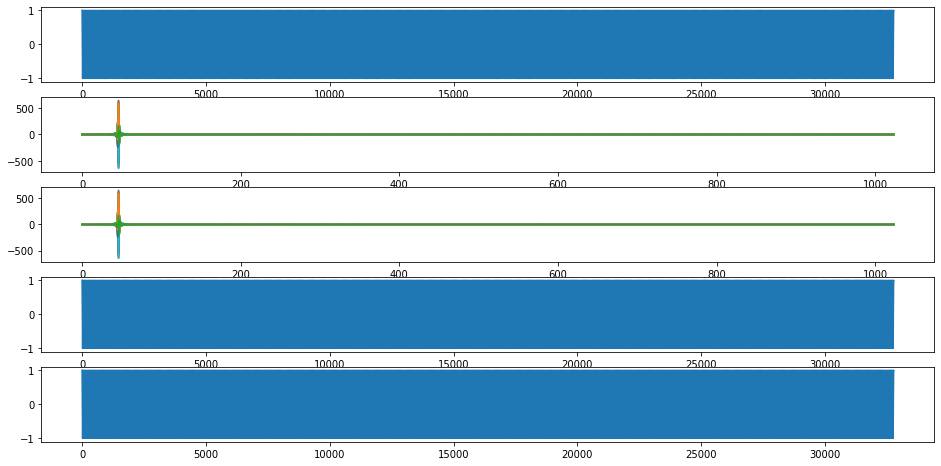

In [112]:
N = 2048
x = np.cos(2*np.pi*np.arange(N*16)/44.1)
my_mdct = MDCT(N, sine_window(N))

mdct_start = time.time()
X = my_mdct.mdct(x)
mdct_end = time.time()
print(f'mdct: {mdct_end - mdct_start}')

mdct_fft_start = time.time()
X_fft = my_mdct.mdct_via_fft(x)
mdct_fft_end = time.time()
print(f'mdct_fft: {mdct_fft_end - mdct_fft_start}')

imdct_start = time.time()
x_hat = my_mdct.imdct(X)
imdct_end = time.time()
print(f'imdct: {imdct_end - imdct_start}')

imdct_fft_start = time.time()
x_hat_fft = my_mdct.imdct_via_ifft(X_fft)
imdct_fft_end = time.time()
print(f'imdct_fft: {imdct_fft_end - imdct_fft_start}')

print(f'erro: {(x - x_hat).sum()}')
print(f'erro_fft: {(x - x_hat_fft).sum()}')
fig, ax = plt.subplots(nrows = 5, ncols = 1, figsize=(16, 8))
ax[0].plot(x)
ax[1].plot(X)
ax[2].plot(X_fft)
ax[3].plot(x_hat)
ax[4].plot(x_hat_fft)

mdct: 0.00539708137512207
mdct_fft: 0.001111745834350586
imdct: 0.002710103988647461
imdct_fft: 0.0808870792388916
erro: 4.340972026284362e-13
erro_fft: -2.857705183600956e-10


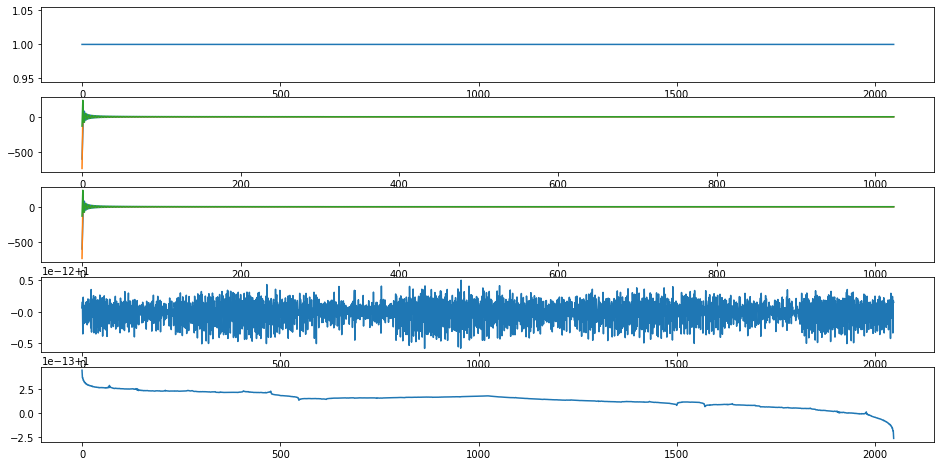

In [113]:
N = 2048
x = np.ones(N)
my_mdct = MDCT(N, sine_window(N))

mdct_start = time.time()
X = my_mdct.mdct(x)
mdct_end = time.time()
print(f'mdct: {mdct_end - mdct_start}')

mdct_fft_start = time.time()
X_fft = my_mdct.mdct_via_fft(x)
mdct_fft_end = time.time()
print(f'mdct_fft: {mdct_fft_end - mdct_fft_start}')

imdct_start = time.time()
x_hat = my_mdct.imdct(X)
imdct_end = time.time()
print(f'imdct: {imdct_end - imdct_start}')

imdct_fft_start = time.time()
x_hat_fft = my_mdct.imdct_via_ifft(X_fft)
imdct_fft_end = time.time()
print(f'imdct_fft: {imdct_fft_end - imdct_fft_start}')

print(f'erro: {(x - x_hat).sum()}')
print(f'erro_fft: {(x - x_hat_fft).sum()}')
fig, ax = plt.subplots(nrows = 5, ncols = 1, figsize=(16, 8))
ax[0].plot(x)
ax[1].plot(X)
ax[2].plot(X_fft)
ax[3].plot(x_hat)
ax[4].plot(x_hat_fft)